<a href="https://colab.research.google.com/github/DarshPatel4/SalaryPredictionLinearRegression/blob/main/SalaryPredictionLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/InternetSpeed.csv")
df

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.000000,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.000000,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.000000,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.000000,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.000000,2.693502,80.535702,4.190802,2612.315499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.382879,86.477319,33.242407,1.754077,3.947383,4.809102,6.040825,0.000000,3.112226,2.456354,92.054785,0.720499,2600.889238
4996,10.372146,90.263339,10.534320,0.093628,7.542697,3.991297,6.245036,0.000000,0.000000,0.000000,97.745403,1.598590,2769.740618
4997,19.752928,94.937252,4.459498,0.607397,9.309467,1.077823,6.707668,0.011109,3.744975,1.019031,97.209409,2.218448,3031.079831
4998,41.708542,42.761359,34.782156,0.886640,6.735571,2.604019,9.772978,0.000000,0.000000,3.915730,96.801547,2.196325,818.064550


**Exploratory Data Analysis (EDA)**

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Ping_latency  Download_speed  Upload_speed  Packet_loss_rate  \
0     21.854305       42.395374     19.934759          0.999340   
1     47.782144       49.976388     17.979781          1.493494   
2     37.939727       86.182002     10.455388          1.125334   
3     31.939632       37.300417     31.148800          0.166605   
4     12.020839       87.616720     24.877960          0.371160   

   Router_distance  Network_congestion  ISP_quality  Connection_type_DSL  \
0         7.569985            1.369483     7.467012             0.000000   
1         2.660608            1.243015     6.215047             2.373401   
2         4.119757            3.416768     9.751490             1.509861   
3         6.969526            4.864465     4.532849             0.000000   
4         5.338804            3.010885     7.114995             1.241954   

   Connection_type_Cable  Connection_type_Fiber  Signal_strength  \
0                    0.0               0.000000        76.190258   
1   

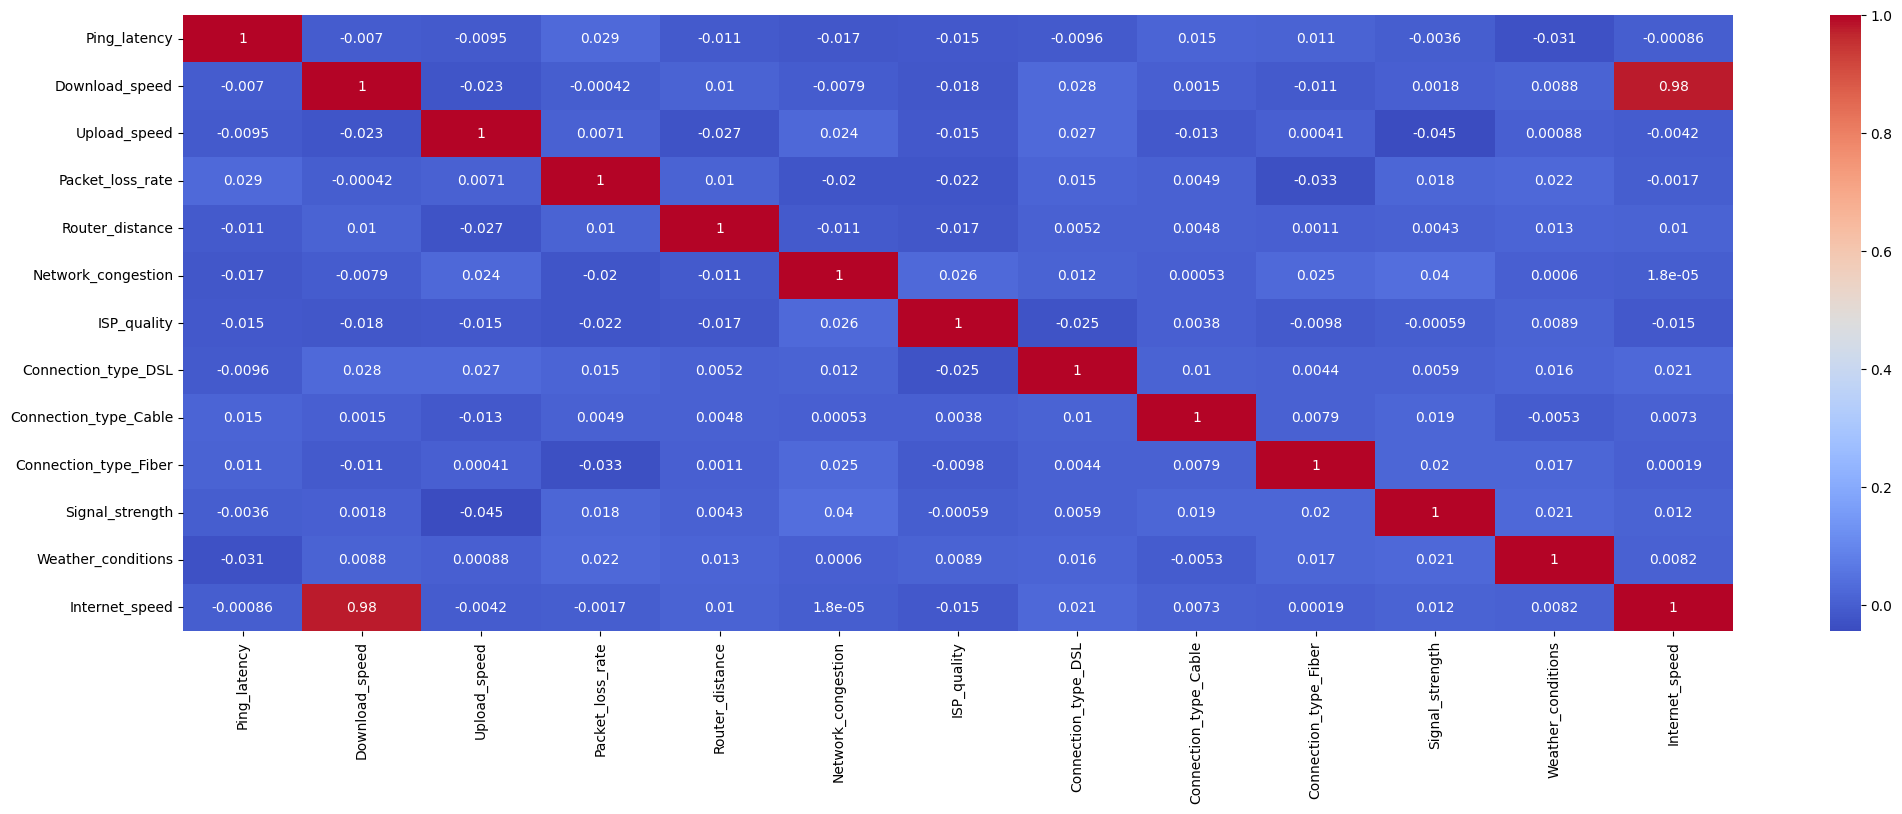

In [ ]:
plt.figure(figsize=(25, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Preprocess the Data**

In [ ]:
df.dropna(inplace=True)  # Dropping missing values for simplicity

**Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split
print(df.columns)

X = df[['Upload_speed','Internet_speed']]  # Features
y = df['Download_speed']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Ping_latency', 'Download_speed', 'Upload_speed', 'Packet_loss_rate',
       'Router_distance', 'Network_congestion', 'ISP_quality',
       'Connection_type_DSL', 'Connection_type_Cable', 'Connection_type_Fiber',
       'Signal_strength', 'Weather_conditions', 'Internet_speed'],
      dtype='object')


**Train the Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluate the Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 35.23298122366713
R-squared: 0.9521253518411622


**Visualize the Results**

Scatter plot with regression line

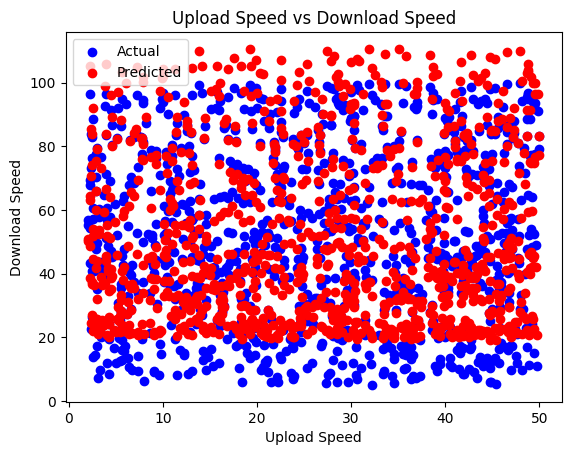

In [ ]:
import matplotlib.pyplot as plt
# Assuming X_test is a 2D array, we extract the first column and flatten it to a 1D array
plt.scatter(X_test.iloc[:, 0].values.ravel(), y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0].values.ravel(), y_pred, color='red', label='Predicted')
plt.xlabel('Upload Speed')
plt.ylabel('Download Speed')
plt.title('Upload Speed vs Download Speed')
plt.legend()
plt.show()

Heatmap for Correlation

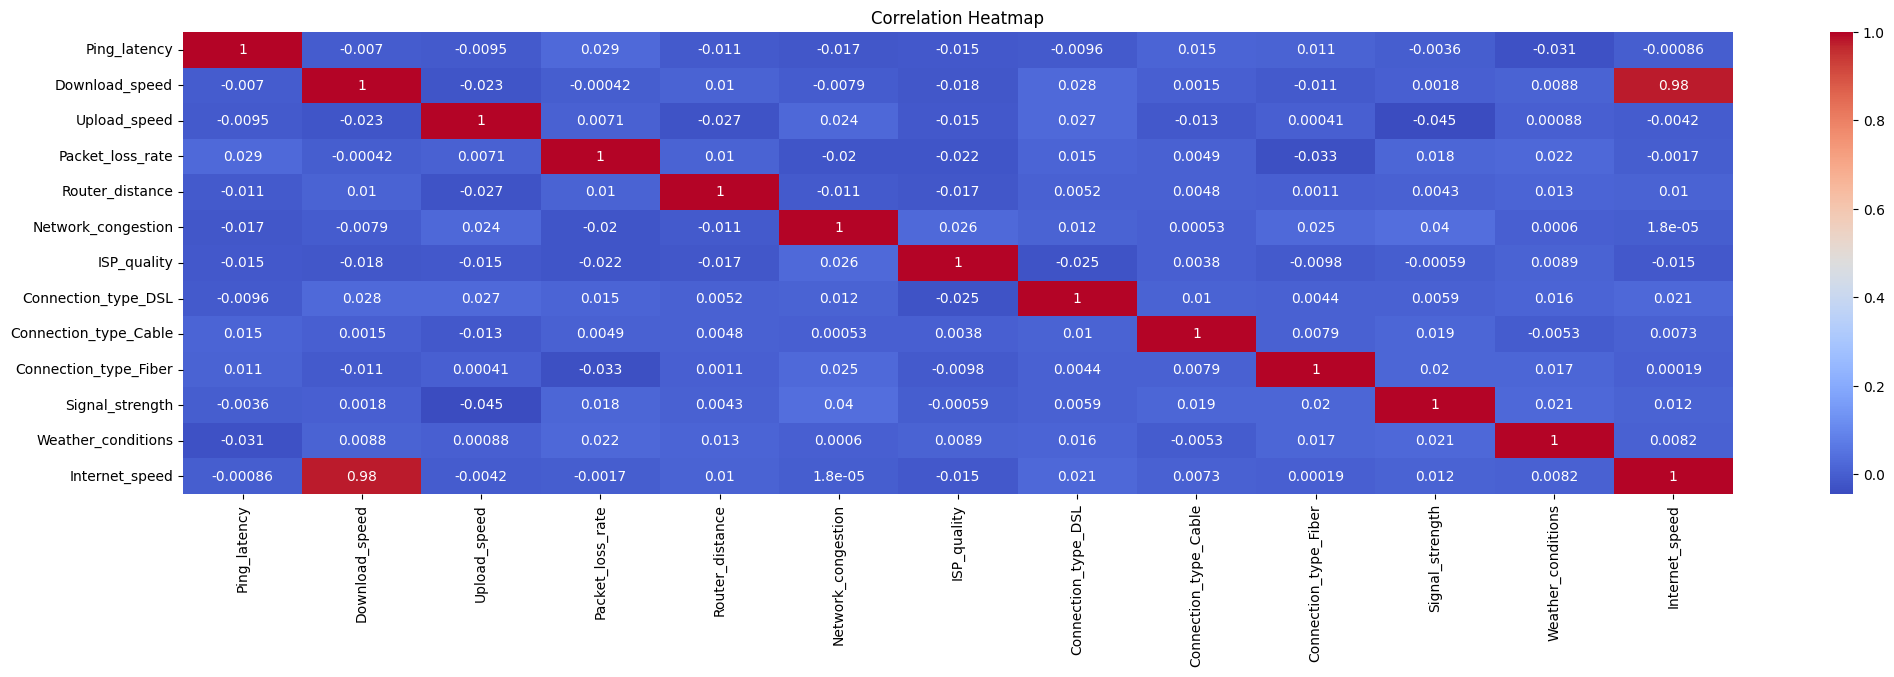

In [ ]:
plt.figure(figsize=(25, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Index(['Ping_latency', 'Download_speed', 'Upload_speed', 'Packet_loss_rate',
       'Router_distance', 'Network_congestion', 'ISP_quality',
       'Connection_type_DSL', 'Connection_type_Cable', 'Connection_type_Fiber',
       'Signal_strength', 'Weather_conditions', 'Internet_speed'],
      dtype='object')


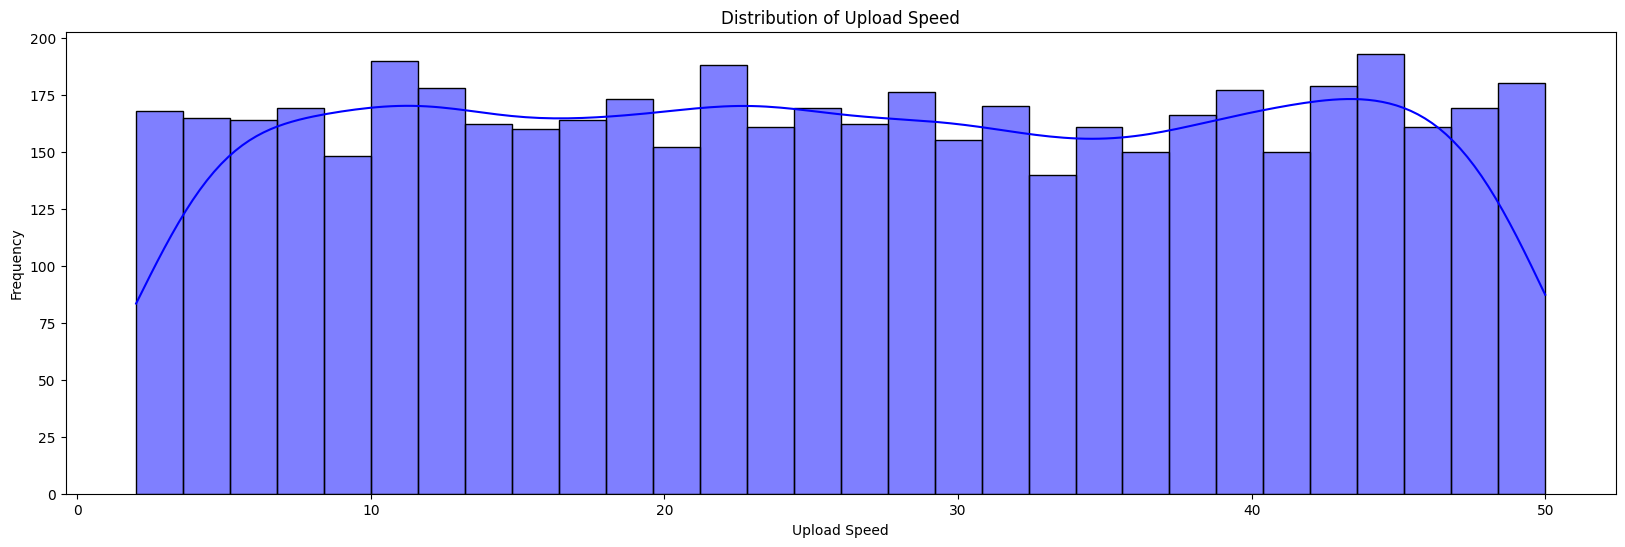

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the available columns to verify the correct column name
print(df.columns)

# Adjust the column name in the histplot function
plt.figure(figsize=(20, 6))
sns.histplot(df['Upload_speed'], kde=True, bins=30, color='blue')
plt.title('Distribution of Upload Speed')
plt.xlabel('Upload Speed')
plt.ylabel('Frequency')
plt.show()

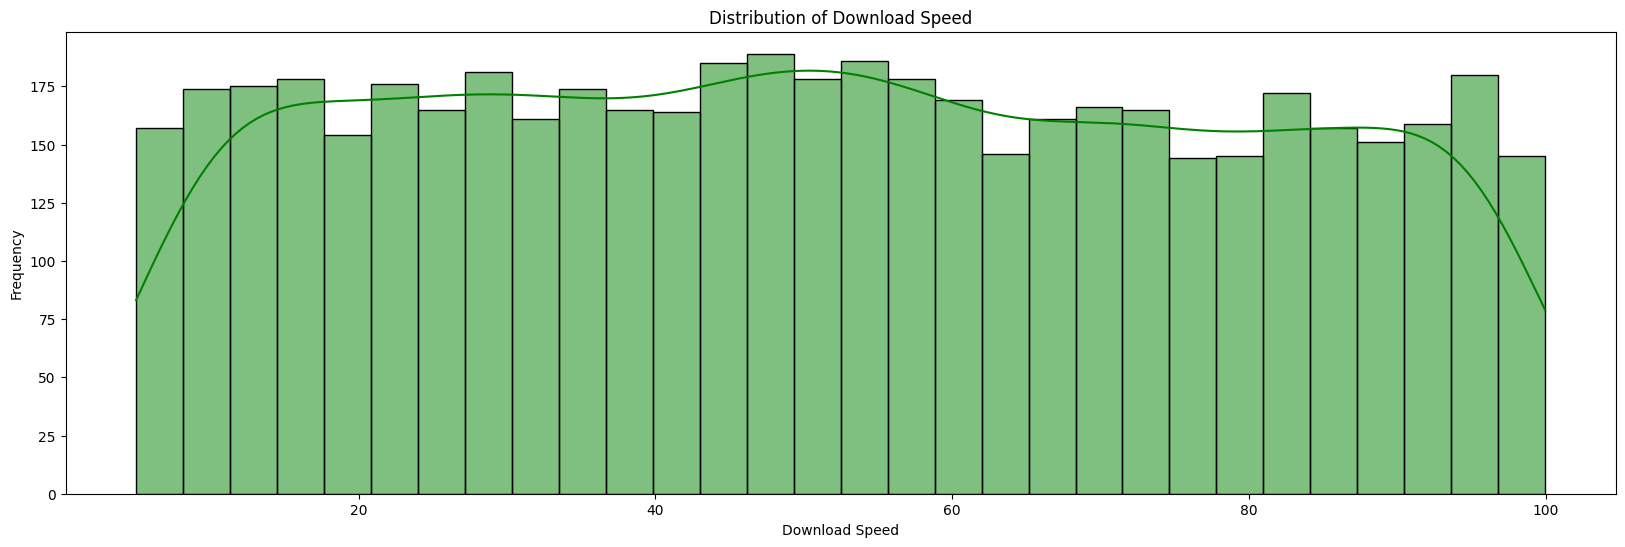

In [ ]:
# Distribution Plot for Download Speed with correct column name
plt.figure(figsize=(20, 6))
sns.histplot(df['Download_speed'], kde=True, bins=30, color='green')
plt.title('Distribution of Download Speed')
plt.xlabel('Download Speed')
plt.ylabel('Frequency')
plt.show()

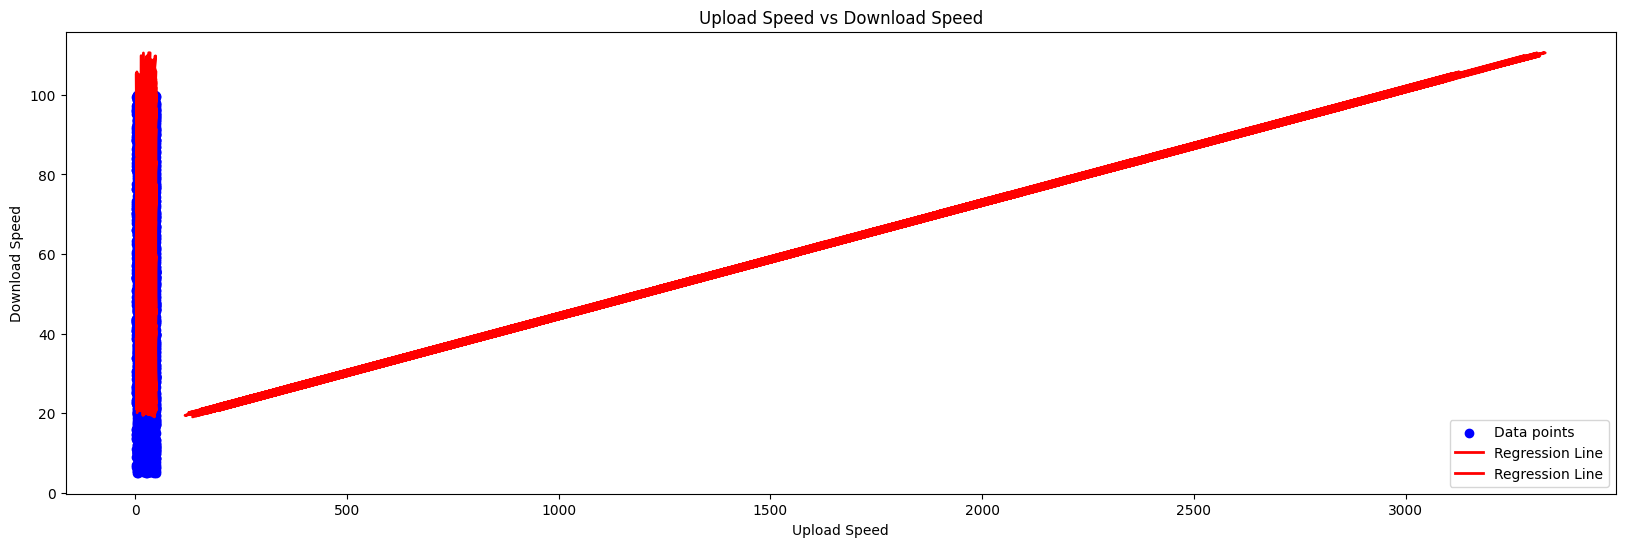

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(df['Upload_speed'], df['Download_speed'], color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Upload Speed')
plt.ylabel('Download Speed')
plt.title('Upload Speed vs Download Speed')
plt.legend()
plt.show()

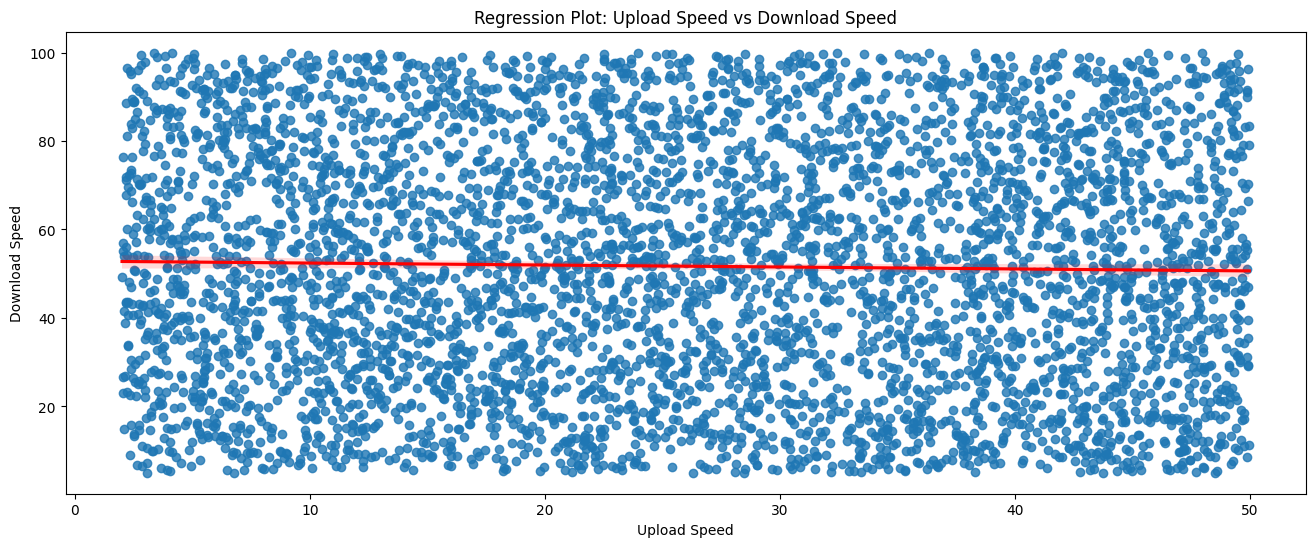

In [ ]:
# Regression Plot
plt.figure(figsize=(16, 6))
sns.regplot(x='Upload_speed', y='Download_speed', data=df, line_kws={'color': 'red'})
plt.title('Regression Plot: Upload Speed vs Download Speed')
plt.xlabel('Upload Speed')
plt.ylabel('Download Speed')
plt.show()

<Figure size 1000x600 with 0 Axes>

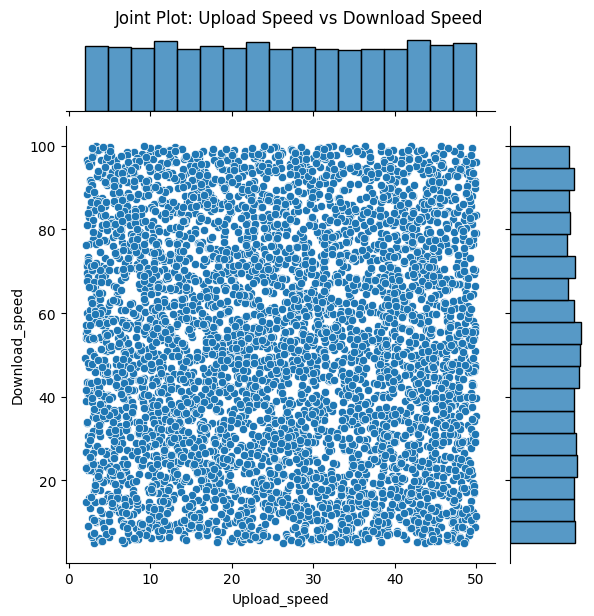

In [ ]:
# Joint Plot
plt.figure(figsize=(16, 6))
sns.jointplot(x='Upload_speed', y='Download_speed', data=df, kind='scatter')
plt.suptitle('Joint Plot: Upload Speed vs Download Speed', y=1.02)
plt.show()